In [1]:
import numpy as np
import tensorflow
print(tensorflow.__version__)
import tensorflow.compat.v1 as tf
from tensorflow.compat.v1.keras import layers
from tensorflow.compat.v1.keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from tensorflow.compat.v1.keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.compat.v1.keras.models import Model
from tensorflow.compat.v1.keras.preprocessing import image
from tensorflow.keras.utils import *
from tensorflow.compat.v1.keras.utils import get_file
from tensorflow.compat.v1.keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from tensorflow.compat.v1.keras.utils import model_to_dot
from tensorflow.compat.v1.keras.utils import plot_model
from kt_utils import *
import tensorflow.compat.v1.keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

2.6.0-dev20210603


In [12]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [13]:
def HappyModel(input_shape):
    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    return model

In [14]:
happyModel = HappyModel(X_train.shape[1:])

In [15]:
happyModel.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ["accuracy"])

In [16]:
happyModel.summary()

Model: "HappyModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0

In [17]:
happyModel.fit(x = X_train, y = Y_train, epochs = 40, batch_size = 64)

Epoch 1/40
10/10 [==============================] - 3s 218ms/step - loss: 3.4155 - accuracy: 0.5367
Epoch 2/40
10/10 [==============================] - 2s 221ms/step - loss: 1.1876 - accuracy: 0.6517
Epoch 3/40
10/10 [==============================] - 2s 207ms/step - loss: 0.4555 - accuracy: 0.8117
Epoch 4/40
10/10 [==============================] - 2s 227ms/step - loss: 0.2956 - accuracy: 0.8700
Epoch 5/40
10/10 [==============================] - 2s 206ms/step - loss: 0.2508 - accuracy: 0.8900
Epoch 6/40
10/10 [==============================] - 2s 210ms/step - loss: 0.1754 - accuracy: 0.9383
Epoch 7/40
10/10 [==============================] - 2s 209ms/step - loss: 0.1266 - accuracy: 0.9600
Epoch 8/40
10/10 [==============================] - 2s 199ms/step - loss: 0.1076 - accuracy: 0.9667
Epoch 9/40
10/10 [==============================] - 2s 201ms/step - loss: 0.0935 - accuracy: 0.9783
Epoch 10/40
10/10 [==============================] - 2s 207ms/step - loss: 0.0946 - accuracy: 0.9733

In [18]:
preds = happyModel.evaluate(x = X_test, y = Y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

5/5 [==============================] - 1s 43ms/step - loss: 0.1296 - accuracy: 0.9733

Loss = 0.12957708537578583
Test Accuracy = 0.9733333587646484


[[1.]]


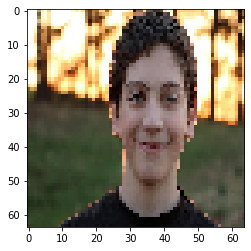

In [19]:
img_path = 'images/happyface.jpg'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(happyModel.predict(x))

[[1.]]


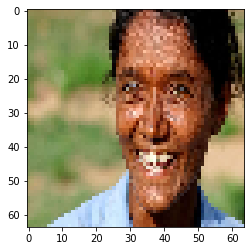

In [20]:
img_path = 'images/happyface2.jpg'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(happyModel.predict(x))

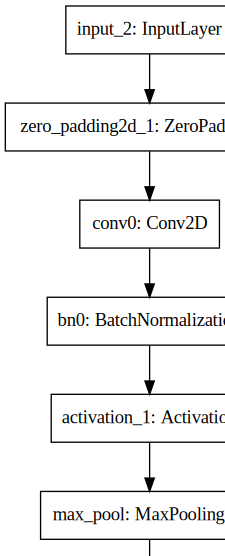

In [22]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))